In [1]:
# import libraries
from pprint import pprint
import importlib
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import matplotlib.animation as animation
from datetime import timedelta
import geopandas as gpd
import matplotlib.animation as animation
from PIL import Image
import io
from datetime import datetime
from owid import catalog
import numpy as np

# my function
import plot_data as pl
import transform_data as td
import statistical_analysis as sa

# Variables
cat = catalog.find(namespace="covid")
tb_country_cases_deaths = cat.iloc[1].load()  
tb_country_vac = cat.iloc[41].load() 
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

## Extract and process cases & deaths data, and vaccine data from owid tables.

In [2]:
df_cd, df_vac = td.process_covid_data(tb_country_cases_deaths, tb_country_vac)

#### Plot cases, deaths and vaccine date for a specfic country.

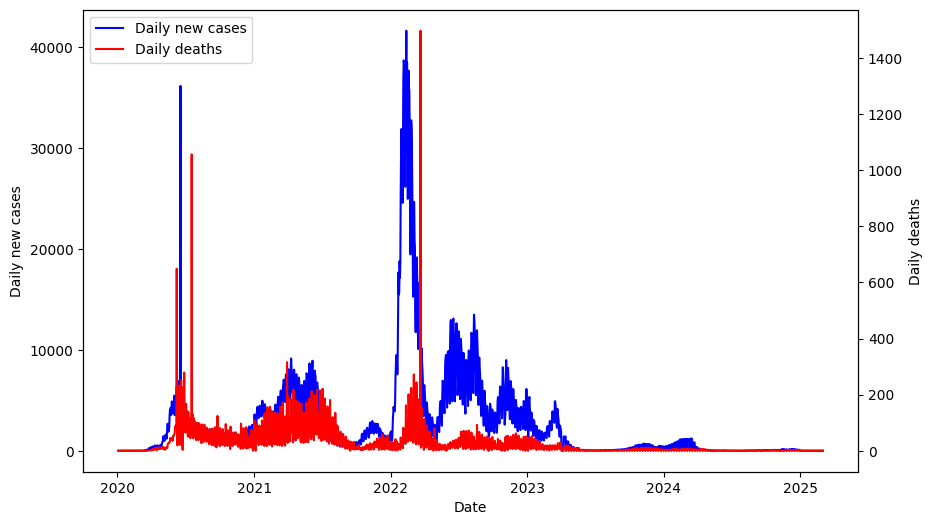

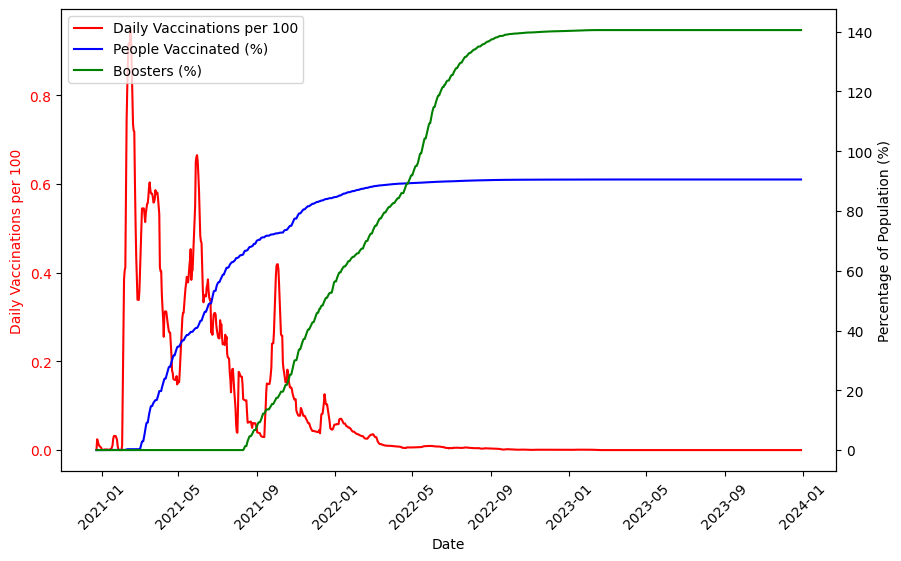

In [101]:
# Plot cases, deaths and vaccination data for a country.
importlib.reload(pl)
country = 'Chile'
pl.plot_country_cd(country, df_cd)
pl.plot_country_vac(country, df_vac)

#### Generate a gif of the cases around the world for a specific date range.

Processing dates: 100%|██████████████████████████████████████████████████████████████| 31/31 [00:53<00:00,  1.72s/date]


Animation saved as cases_animation.gif


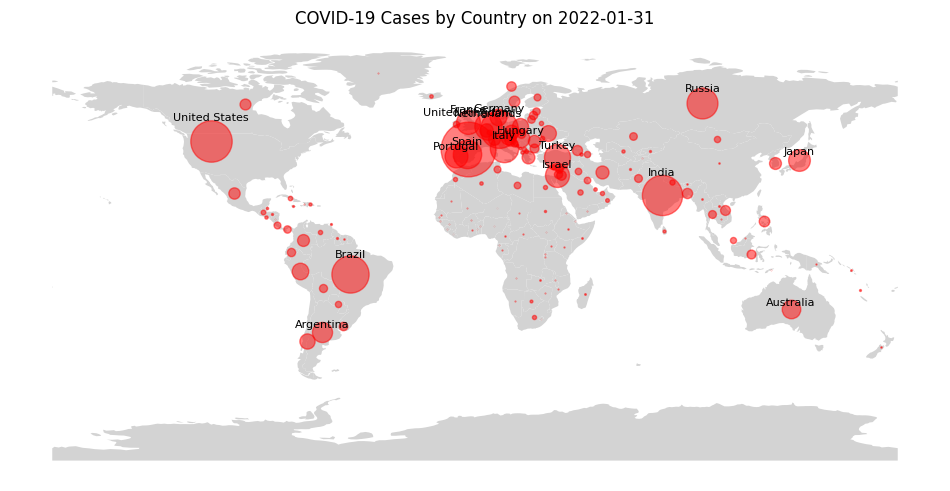

In [104]:
importlib.reload(pl)
fig, ax = plt.subplots(figsize=(12, 8))
num_show_name = 40e3
show_plot = True
start_date = '2022-01-01'
end_date = '2022-01-31'

pl.create_world_map_cases_animation(fig, ax, df_cd, world, 'cases_animation.gif', start_date, end_date, num_show_name)

## Covid deaths per million people vs the date that 80% of the population where vaccinated.

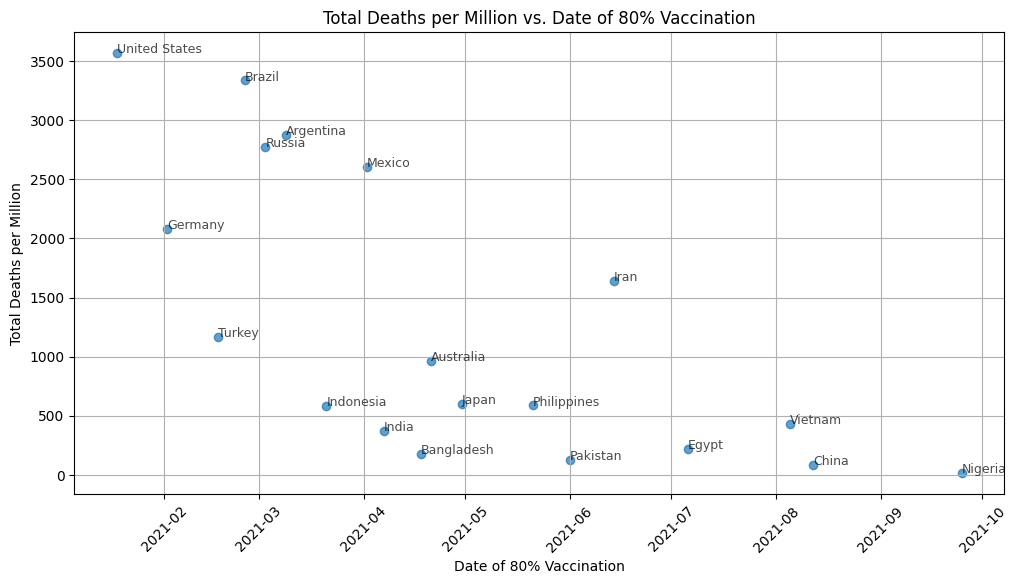

In [106]:
importlib.reload(sa)
country_list = [
    "China", "India", "United States", "Indonesia", "Pakistan",
    "Brazil", "Nigeria", "Bangladesh", "Russia", "Mexico",
    "Japan", "Philippines", "Egypt", "Vietnam",
    "Argentina", "Turkey", "Iran", "Germany", "Australia", "Mexico"
]

sa.vax_vs_total_deaths(df_cd, df_vac, country_list)

## Correlations between cases and deaths at different levels of vaccination.

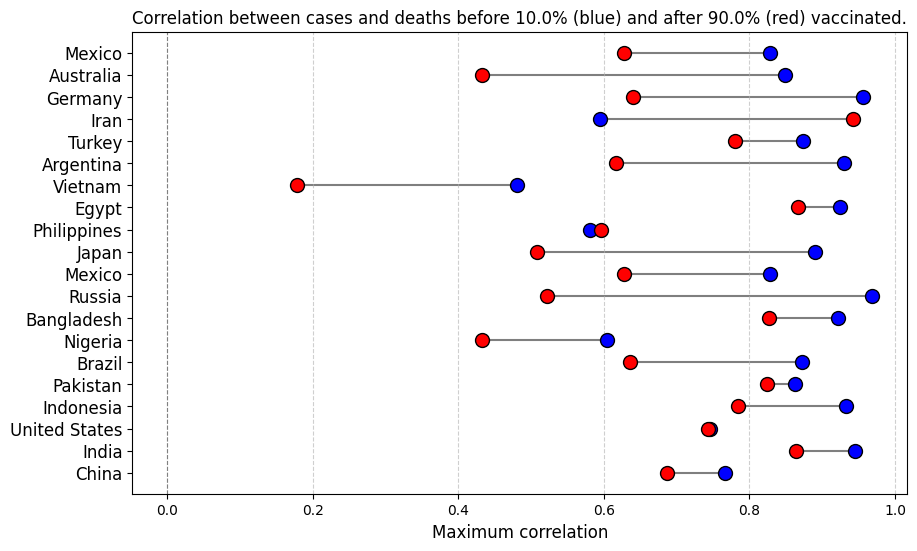

In [107]:
importlib.reload(sa)

max_lag = 200
v_low = 0.1
v_high = 0.9
max_lagged_corr=  sa.find_cd_correlations_for_vax_rate(df_cd, df_vac, v_low, v_high, max_lag, country_list)
sa.plot_cd_correlation_vax_rate(max_lagged_corr, v_low, v_high, country_list)
